In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

pd.set_option('display.max_columns', None)

In [2]:
data_raw = pd.read_csv('C:/Users/pc230/Downloads/loan_data_2007_2014.csv', index_col=0)
data_raw.shape

C:\Users\pc230\AppData\Local\Temp\ipykernel_2096\2633128513.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv('C:/Users/pc230/Downloads/loan_data_2007_2014.csv', index_col=0)


(466285, 74)

In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13  annu

In [4]:
data_raw.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-04,3.0,NaN,NaN,9.0,0.0,7963,28.3,12.0,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-15,161.03,NaN,Sep-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photo

In [5]:
#MENDETEKSI DATA DUPLIKAT
print(data_raw.id.nunique(),data_raw.member_id.nunique())

466285 466285


In [6]:
#MENGHAPUS KOLOM YANG TIDAK PENTING
cols_to_drop = [
    # unique id
    'id'
    , 'member_id'
    
    # free text
    , 'url'
    , 'desc'
    
    # all null / constant / others
    , 'zip_code' 
    , 'annual_inc_joint'
    , 'dti_joint'
    , 'verification_status_joint'
    , 'open_acc_6m'
    , 'open_il_6m'
    , 'open_il_12m'
    , 'open_il_24m'
    , 'mths_since_rcnt_il'
    , 'total_bal_il'
    , 'il_util'
    , 'open_rv_12m'
    , 'open_rv_24m'
    , 'max_bal_bc'
    , 'all_util'
    , 'inq_fi'
    , 'total_cu_tl'
    , 'inq_last_12m'
    
    # expert judgment
    , 'sub_grade'
]
data = data_raw.drop(cols_to_drop, axis=1)

In [7]:
#LABELING VARIABEL TARGET
data.loan_status.value_counts(normalize=True)*100

bad_status = [
    'Charged Off' 
    , 'Default' 
    , 'Does not meet the credit policy. Status:Charged Off'
    , 'Late (31-120 days)'
]
data['bad_flag'] = np.where(data['loan_status'].isin(bad_status), "bad", "good")
data['bad_flag'].value_counts(normalize=True)*100

bad_flag
good    89.069346
bad     10.930654
Name: proportion, dtype: float64

In [8]:
data.drop('loan_status', axis=1, inplace=True)

In [9]:
#DATA CLEANING, PREPROCESSING DAN FEATURES ENGINEERING
#modifikasi data
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [10]:
# Buat kolom 'emp_length_int' terlebih dahulu sebelum menggantinya, Kemudian, lakukan penggantian nilai dalam kolom 'emp_length_int', Mengubah tipe data kolom menjadi float
data['emp_length_int'] = data['emp_length']
data['emp_length_int'] = data['emp_length_int'].str.replace('< 1 year', '0')
data['emp_length_int'] = data['emp_length_int'].str.replace(' years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace(' year', '')
data['emp_length_int'] = data['emp_length_int'].replace('10+', '10')
data['emp_length_int'] = data['emp_length_int'].astype(float)
data.drop('emp_length', axis=1, inplace=True)

In [11]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [12]:
#Kolom term yang awalnya bersatuan months dihapus dan data dirubah ke integer
data['term_int'] = data['term'].str.replace(' months', '')
data['term_int'] = data['term_int'].astype(float)
data.drop('term', axis=1, inplace=True)

In [13]:
#Merubah format earliest_cr_line_date menjadi bulan-tahun
data['earliest_cr_line_date'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%y')
data['earliest_cr_line_date'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [14]:
#Mendefinisikan variabel mths_since_earliest_cr_line
data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
data['mths_since_earliest_cr_line'].head(3)

0    388.0
1    220.0
2    189.0
Name: mths_since_earliest_cr_line, dtype: float64

In [15]:
#Deskripsi variabel mths_since_earliest_cr_line
data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        235.142031
std          92.270010
min        -601.000000
25%         180.000000
50%         221.000000
75%         280.000000
max         576.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [16]:
#Mengganti data dari var mths_since_earliest_cr_line dengan nilai max nya
data[data['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3)
data.loc[data['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = data['mths_since_earliest_cr_line'].max()
data.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

In [17]:
#Merubah format issue_d_date ke bulan-tahun, mendefinisikan var mths_since_issue_d
data['issue_d_date'] = pd.to_datetime(data['issue_d'], format='%b-%y')
data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['issue_d_date']) / np.timedelta64(1, 'M')))
data['mths_since_issue_d'].describe()

count    466285.000000
mean         50.204806
std          14.190212
min          35.000000
25%          40.000000
50%          46.000000
75%          56.000000
max         124.000000
Name: mths_since_issue_d, dtype: float64

In [18]:
data.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

In [19]:
#Mendeskripsikan var mths_since_last_pymnt_d
data['last_pymnt_d_date'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')
data['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_pymnt_d_date']) / np.timedelta64(1, 'M')))
data['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         30.916097
std          12.406823
min          23.000000
25%          23.000000
50%          24.000000
75%          34.000000
max         118.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [20]:
data.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

In [21]:
#Mendeskripsikan var mths_since_next_pymnt_d
data['next_pymnt_d_date'] = pd.to_datetime(data['next_pymnt_d'], format='%b-%y')
data['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['next_pymnt_d_date']) / np.timedelta64(1, 'M')))
data['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.722279
std           5.928592
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         118.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [22]:
data.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

In [23]:
#Mendeskripsikan var mths_since_last_credit_pull_d
data['last_credit_pull_d_date'] = pd.to_datetime(data['last_credit_pull_d'], format='%b-%y')
data['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))
data['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         26.856223
std           9.303991
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         125.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [24]:
data.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

<Axes: >

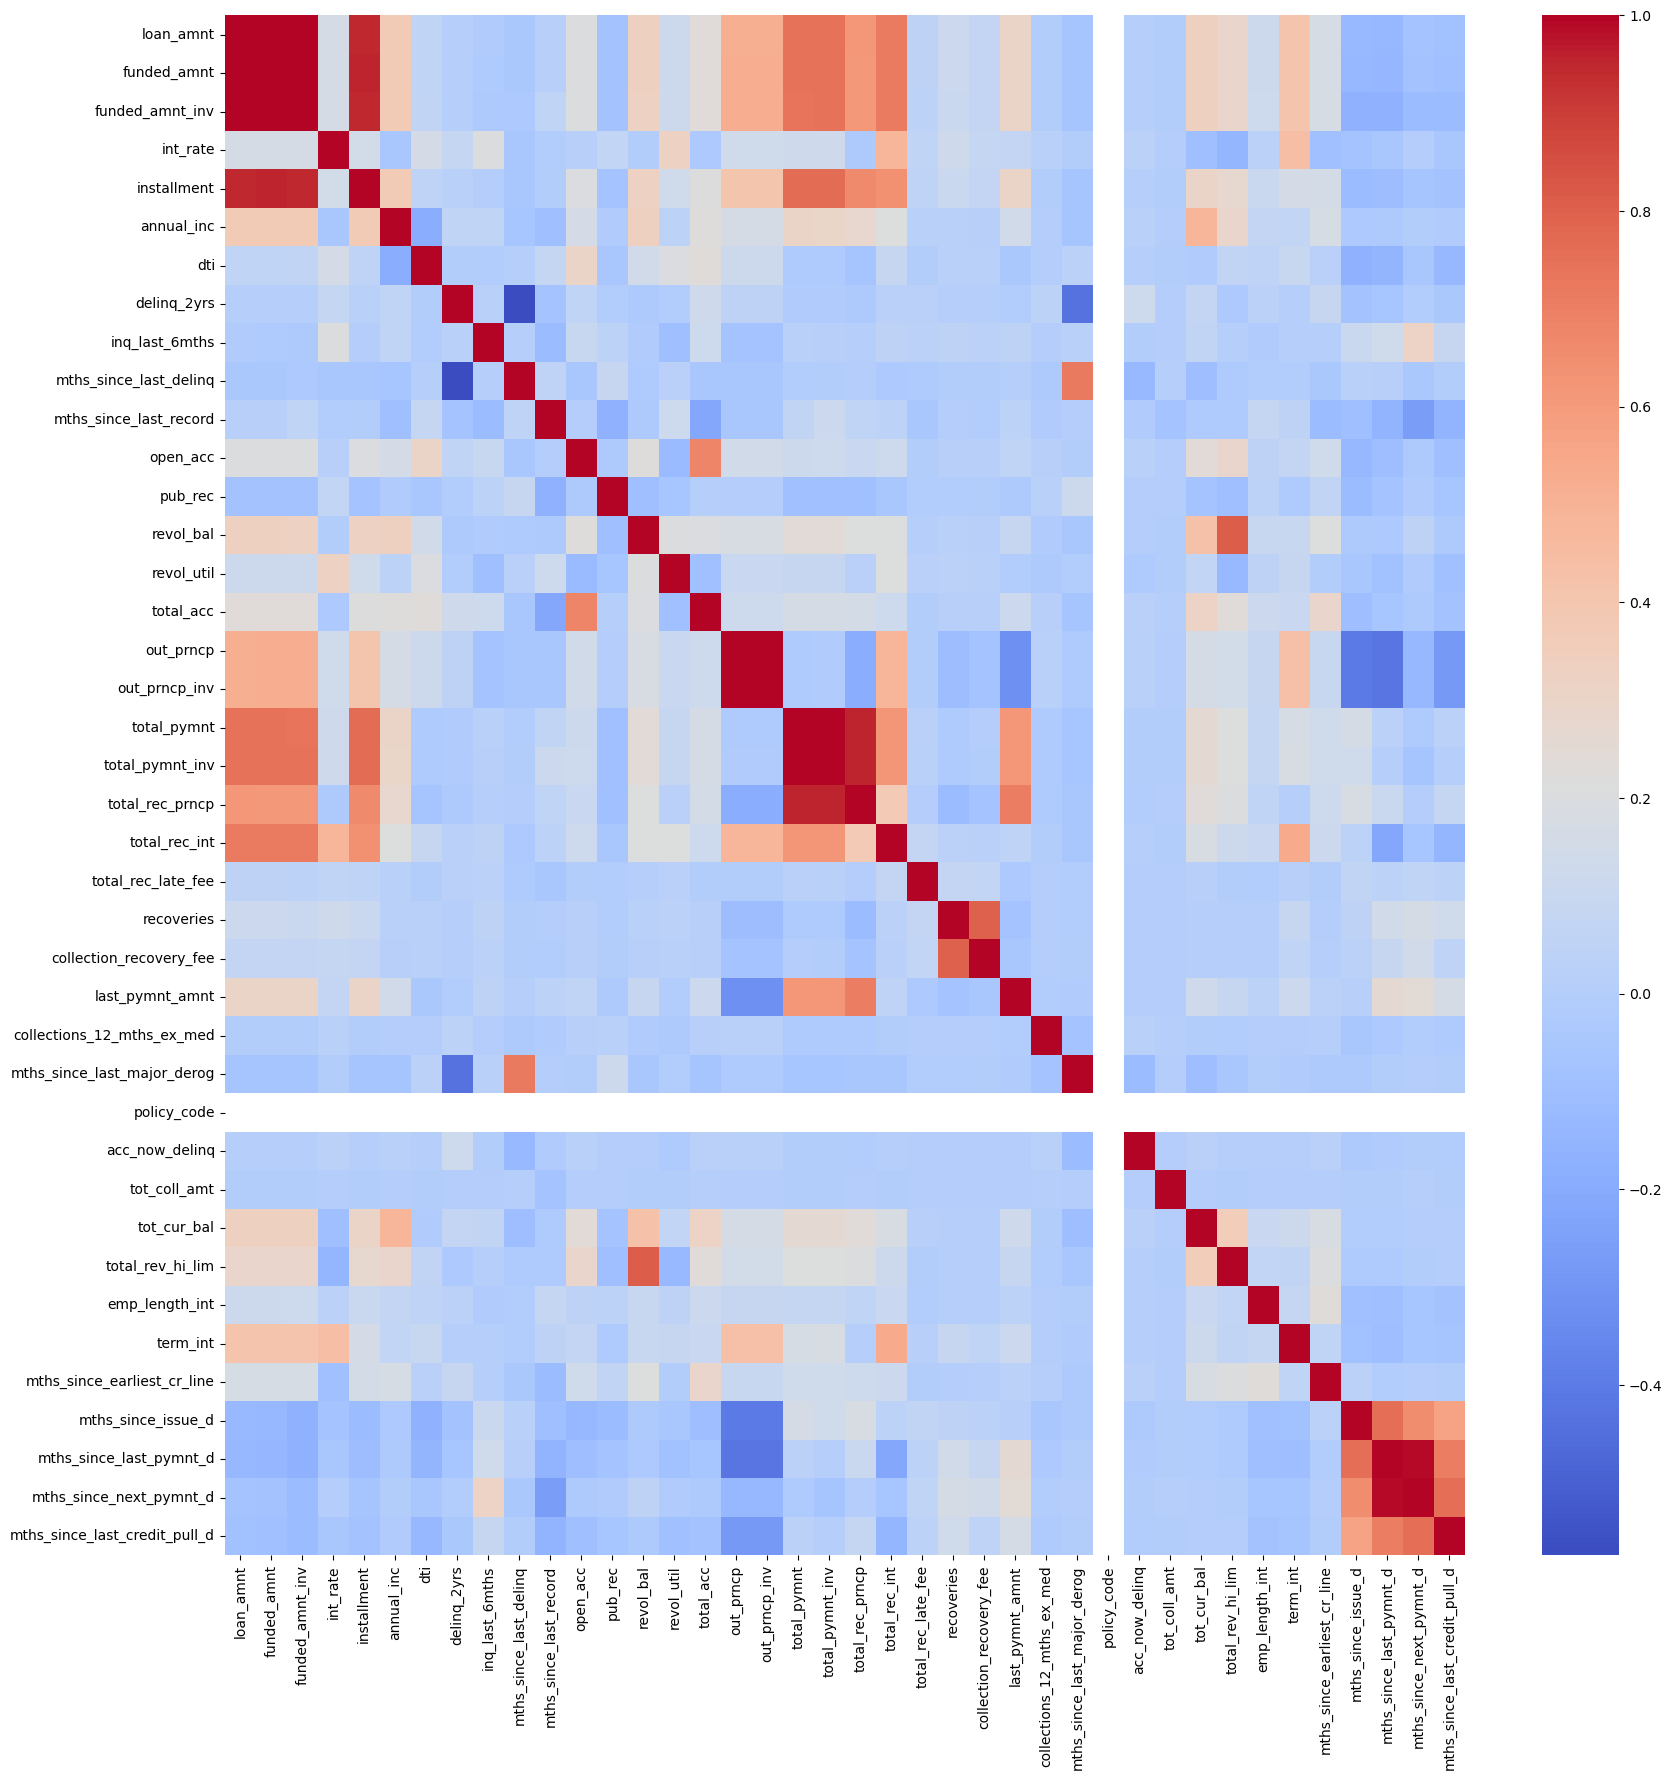

In [25]:
#EXPLORATORY DATA ANALYSIS
# Menghitung korelasi hanya untuk kolom-kolom numerik
correlation_matrix = data.select_dtypes(include=['number']).corr()
# Menampilkan heatmap korelasi
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cmap='coolwarm')

In [26]:
#Jika ada variabel yang saling berkorelasi, dihapus 1 yang nilai korelasinya diatas 0.7
corr_matrix = data.select_dtypes(include=['number']).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

In [27]:
data.drop(to_drop_hicorr, axis=1, inplace=True)

In [28]:
data.select_dtypes(include='object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63098
addr_state                 50
initial_list_status         2
application_type            1
bad_flag                    2
dtype: int64

In [29]:
data.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

In [30]:
data.select_dtypes(exclude='object').nunique()

loan_amnt                        1352
int_rate                          506
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
mths_since_last_record            123
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
total_rec_late_fee               5808
recoveries                      22773
collections_12_mths_ex_med          9
policy_code                         1
acc_now_delinq                      6
tot_coll_amt                     6321
tot_cur_bal                    220690
emp_length_int                     11
term_int                            2
mths_since_earliest_cr_line       505
mths_since_issue_d                 90
dtype: int64

In [31]:
#Untuk data bertipe object dihitung jumlah per valuenya
for col in data.select_dtypes(include='object').columns.tolist():
    print(data[col].value_counts(normalize=True)*100)
    print('\n')

grade
B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: proportion, dtype: float64


home_ownership
MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: proportion, dtype: float64


verification_status
Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: proportion, dtype: float64


pymnt_plan
n    99.99807
y     0.00193
Name: proportion, dtype: float64


purpose
debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276


In [32]:
data.drop('pymnt_plan', axis=1, inplace=True)

In [33]:
#MELAKUKAN CEK MISSING VALUE
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_record         86.566585
mths_since_last_delinq         53.690554
tot_coll_amt                   15.071469
tot_cur_bal                    15.071469
emp_length_int                  4.505399
revol_util                      0.072917
collections_12_mths_ex_med      0.031097
delinq_2yrs                     0.006219
inq_last_6mths                  0.006219
open_acc                        0.006219
pub_rec                         0.006219
total_acc                       0.006219
acc_now_delinq                  0.006219
mths_since_earliest_cr_line     0.006219
annual_inc                      0.000858
dtype: float64

In [34]:
#missing value lebih dari 75% dibuang featurenya
data.drop('mths_since_last_record', axis=1, inplace=True)

In [35]:
#fill variabel yang ada nilai na
data['annual_inc'].fillna(data['annual_inc'].mean(), inplace=True)
data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
data['acc_now_delinq'].fillna(0, inplace=True)
data['total_acc'].fillna(0, inplace=True)
data['pub_rec'].fillna(0, inplace=True)
data['open_acc'].fillna(0, inplace=True)
data['inq_last_6mths'].fillna(0, inplace=True)
data['delinq_2yrs'].fillna(0, inplace=True)
data['collections_12_mths_ex_med'].fillna(0, inplace=True)
data['revol_util'].fillna(0, inplace=True)
data['emp_length_int'].fillna(0, inplace=True)
data['tot_cur_bal'].fillna(0, inplace=True)
data['tot_coll_amt'].fillna(0, inplace=True)
data['mths_since_last_delinq'].fillna(-1, inplace=True)

In [36]:
#Merubah bad flag
data['bad_flag'] = data['bad_flag'].replace({1: 'bad', 0: 'good'})
data['bad_flag'].head()

0    good
1     bad
2    good
3    good
4    good
Name: bad_flag, dtype: object

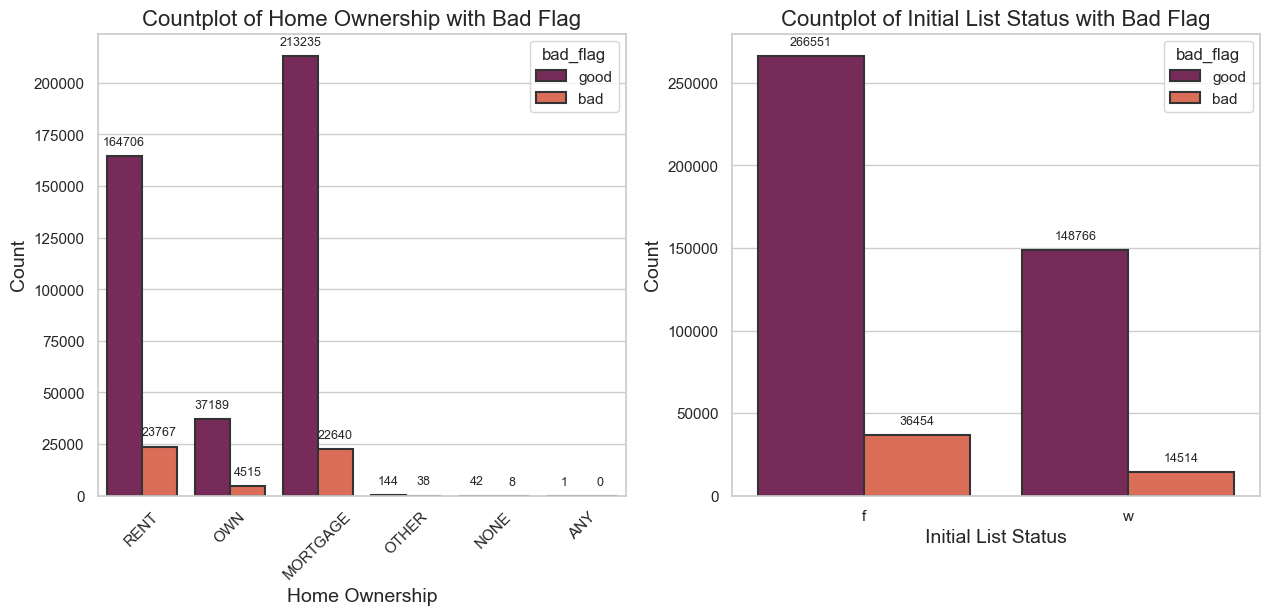

In [37]:
#EKSPLORASI DATA

#BARPLOT X
sns.set(style="whitegrid")  # Set style for aesthetics
palette = "rocket"  # You can try other palettes like "Set2", "husl", etc.
plt.figure(figsize=(15, 6))
# Plot for 'grade'
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x="home_ownership", hue="bad_flag", data=data, palette=palette, edgecolor="0.2", linewidth=1.5)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=9)
plt.xlabel("Home Ownership", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Countplot of Home Ownership with Bad Flag", fontsize=16)
# Plot for 'verification_status'
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x="initial_list_status", hue="bad_flag", data=data, palette=palette, edgecolor="0.2", linewidth=1.5)
ax2.set_xticklabels(ax2.get_xticklabels())
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=9)
plt.xlabel("Initial List Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Countplot of Initial List Status with Bad Flag", fontsize=16)
# Show the plot
plt.show()


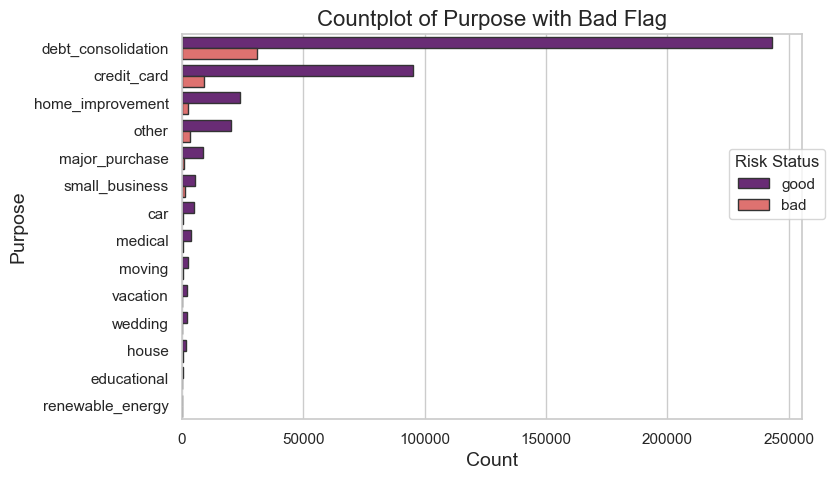

In [38]:
#BARPLOT Y
# Choose a different color palette
palette = "magma"  # You can try other palettes like "dark", "colorblind", etc.
# Get the counts of each 'purpose' category sorted in descending order
sorted_purpose_counts = data['purpose'].value_counts().sort_values(ascending=False).index
# Plotting the countplot with enhanced aesthetics and horizontal orientation
plt.figure(figsize=(8, 5))  # Set the figure size
ax = sns.countplot(y="purpose", hue="bad_flag", data=data, palette=palette, edgecolor="0.2", linewidth=1, orient="h", order=sorted_purpose_counts)
# Add labels and title
plt.xlabel("Count", fontsize=14)
plt.ylabel("Purpose", fontsize=14)
plt.title("Countplot of Purpose with Bad Flag", fontsize=16)
# Move legend to the lower right
plt.legend(title="Risk Status", title_fontsize="12", bbox_to_anchor=(1.05, 0.5), loc='lower right')
# Show the plot
plt.show()

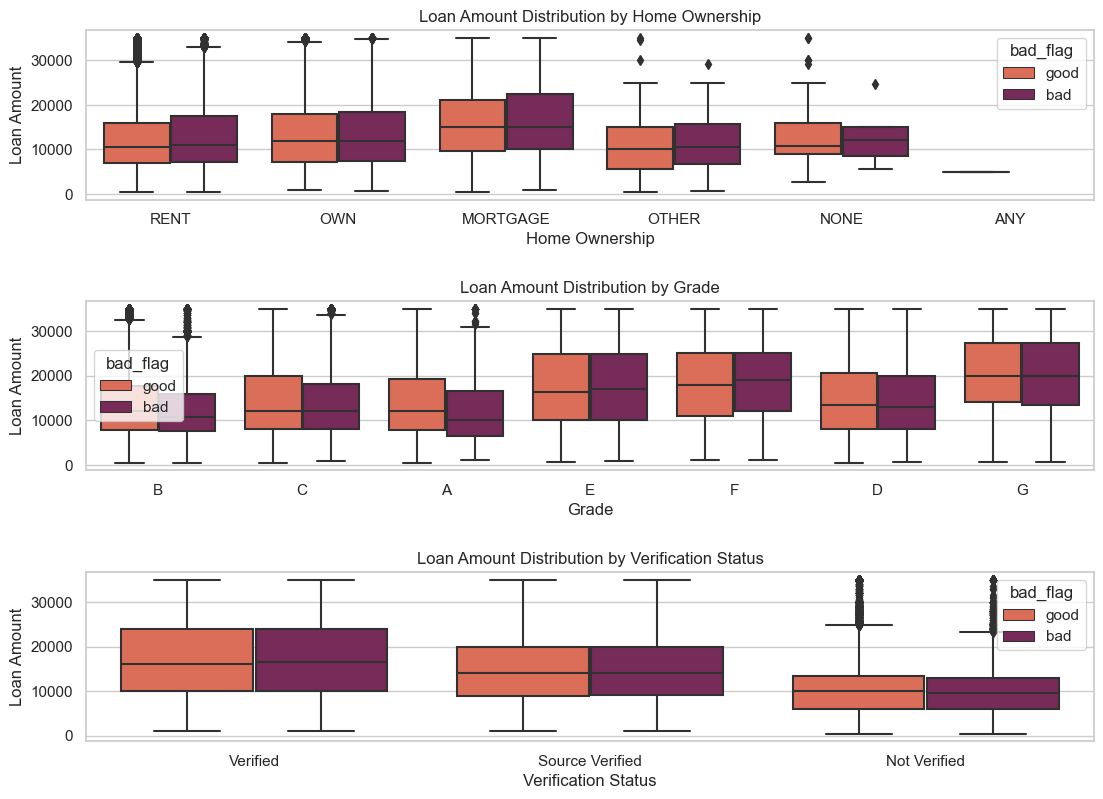

In [39]:
#BOXPLOT
sns.set(style="whitegrid")  # Set style for aesthetics
# Choose a different color palette
palette = "rocket_r"  # You can try other palettes like "dark", "colorblind", etc.
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(13, 9))
# Boxplot for 'home_ownership'
sns.boxplot(x="home_ownership", y="loan_amnt", data=data, hue="bad_flag", palette=palette, ax=ax1)
ax1.set_ylabel("Loan Amount")
ax1.set_xlabel("Home Ownership")
ax1.set_title("Loan Amount Distribution by Home Ownership", fontsize=12)
# Boxplot for 'grade'
sns.boxplot(x="grade", y="loan_amnt", data=data, hue="bad_flag", palette=palette, ax=ax2)
ax2.set_ylabel("Loan Amount")
ax2.set_xlabel("Grade")
ax2.set_title("Loan Amount Distribution by Grade", fontsize=12)
# Boxplot for 'verification_status'
sns.boxplot(x="verification_status", y="loan_amnt", data=data, hue="bad_flag", palette=palette, ax=ax3)
ax3.set_ylabel("Loan Amount")
ax3.set_xlabel("Verification Status")
ax3.set_title("Loan Amount Distribution by Verification Status", fontsize=12)
# Adjust layout for better spacing
plt.subplots_adjust(hspace=0.6, top=0.9)
plt.show()

In [40]:
data['bad_flag'] = data['bad_flag'].replace({'bad': 1, 'good': 0})
data['bad_flag'] = data['bad_flag'].astype(int)

In [41]:
data.describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,bad_flag,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d
count,466285.000000,466285.000000,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.0,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000
mean,14317.277577,13.829236,7.327738e+04,17.218758,0.284661,0.804695,15.256667,11.186373,0.160554,1.623020e+04,56.135985,25.062871,4410.062342,0.650129,85.344211,0.009082,1.0,0.004002,1.629893e+02,1.178823e+05,0.109307,5.723307,42.605334,237.976523,50.204806
std,8286.509164,4.357587,5.496333e+04,7.851121,0.797343,1.091583,22.935753,4.988151,0.510848,2.067625e+04,23.772387,11.601464,6355.078769,5.265730,552.216084,0.108632,0.0,0.068635,1.348289e+04,1.487196e+05,0.312024,3.756084,10.719040,84.907343,14.190212
min,500.000000,5.420000,1.896000e+03,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,36.000000,0.000000,35.000000
25%,8000.000000,10.990000,4.500000e+04,11.360000,0.000000,0.000000,-1.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,1.546700e+04,0.000000,2.000000,36.000000,181.000000,40.000000
50%,12000.000000,13.660000,6.300000e+04,16.870000,0.000000,0.000000,-1.000000,10.000000,0.000000,1.176400e+04,57.500000,23.000000,441.470000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,5.247900e+04,0.000000,6.000000,36.000000,222.000000,46.000000
75%,20000.000000,16.490000,8.895300e+04,22.780000,0.000000,1.000000,28.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,1.849300e+05,0.000000,10.000000,60.000000,280.000000,56.000000
max,35000.000000,26.060000,7.500000e+06,39.990000,29.000000,33.000000,188.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,32160.380000,358.680000,33520.270000,20.000000,1.0,5.000000,9.152545e+06,8.000078e+06,1.000000,10.000000,60.000000,576.000000,124.000000


In [42]:
#FEATURE SCALING AND TRANSFORMATION
categorical_cols = [col for col in data.select_dtypes(include='object').columns.tolist()]
onehot = pd.get_dummies(data[categorical_cols], drop_first=True)
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,True,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [43]:
data.select_dtypes(include='object').head()

,grade,home_ownership,verification_status,purpose,addr_state,initial_list_status
0,B,RENT,Verified,credit_card,AZ,f
1,C,RENT,Source Verified,car,GA,f
2,C,RENT,Not Verified,small_business,IL,f
3,C,RENT,Source Verified,other,CA,f
4,B,RENT,Source Verified,other,OR,f


In [44]:
numerical_cols = [col for col in data.columns.tolist() if col not in categorical_cols + ['bad_flag']]

In [45]:
#STANDARISASI DATA
ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(data[numerical_cols]), columns=numerical_cols)
std.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d
0,-1.124392,-0.729587,-0.896551,1.328632,-0.357012,0.178920,-0.708792,-1.641166,-0.31429,-0.124888,1.159498,-1.384557,-0.693944,-0.123464,-0.154549,-0.083608,0.0,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,1.766910,1.465462
1,-1.426088,0.330634,-0.787387,-2.065791,-0.357012,3.843328,-0.708792,-1.641166,-0.31429,-0.703378,-1.965980,-1.815538,-0.693944,-0.123464,0.057470,-0.083608,0.0,-0.058307,-0.012089,-0.792648,-1.523744,1.622784,-0.211720,1.465462
2,-1.438156,0.488979,-1.110294,-1.082491,-0.357012,1.095022,-0.708792,-1.841641,-0.31429,-0.642003,1.782070,-1.298361,-0.693944,-0.123464,-0.154549,-0.083608,0.0,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,-0.576824,1.465462
3,-0.521001,-0.077850,-0.438063,0.354248,-0.357012,0.178920,0.860811,-0.237839,-0.31429,-0.514224,-1.478018,1.028934,-0.693944,3.099264,-0.154549,-0.083608,0.0,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,0.224050,1.465462
4,-1.365749,-0.261438,0.122311,0.091865,-0.357012,-0.737182,0.991612,0.764538,-0.31429,0.558748,-0.094058,1.115130,-0.573268,-0.123464,-0.154549,-0.083608,0.0,-0.058307,-0.012089,-0.792648,-1.257509,1.622784,0.235828,1.465462


In [46]:
data_model = pd.concat([onehot, std, data[['bad_flag']]], axis=1)
data_model.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d,bad_flag
0,True,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,-1.124392,-0.729587,-0.896551,1.328632,-0.357012,0.178920,-0.708792,-1.641166,-0.31429,-0.124888,1.159498,-1.384557,-0.693944,-0.123464,-0.154549,-0.083608,0.0,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,1.766910,1.465462,0
1,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,-1.426088,0.330634,-0.787387,-2.065791,-0.357012,3.843328,-0.708792,-1.641166,-0.31429,-0.703378,-1.965980,-1.815538,-0.693944,-0.123464,0.057470,-0.083608,0.0,-0.058307,-0.012089,-0.792648,-1.523744,1.622784,-0.211720,1.465462,1
2,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,-1.438156,0.488979,-1.110294,-1.082491,-0.357012,1.095022,-0.708792,-1.841641,-0.31429,-0.642003,1.782070,-1.298361,-0.693944,-0.123464,-0.154549,-0.083608,0.0,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,-0.576824,1.465462,0
3,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [47]:
#MODELING
#TRAIN-TEST SPLIT
X = data_model.drop('bad_flag', axis=1)
y = data_model['bad_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((326399, 100), (139886, 100))

In [48]:
#REGRESI LOGISTIK
log = LogisticRegression(max_iter=1000)
log.fit(X_train, y_train)
y_pred_log = log.predict(X_test)
print(accuracy_score(y_pred_log, y_test))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

0.9391147076905481
[[124382    122]
 [  8395   6987]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    124504
           1       0.98      0.45      0.62     15382

    accuracy                           0.94    139886
   macro avg       0.96      0.73      0.79    139886
weighted avg       0.94      0.94      0.93    139886



In [49]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(accuracy_score(y_pred_knn, y_test))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

0.8776932645153911
[[116713   7791]
 [  9318   6064]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93    124504
           1       0.44      0.39      0.41     15382

    accuracy                           0.88    139886
   macro avg       0.68      0.67      0.67    139886
weighted avg       0.87      0.88      0.87    139886



In [50]:
#RANDOMFOREST
rf = RandomForestClassifier(max_depth=4)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(accuracy_score(y_pred_rf, y_test))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

0.893992250832821
[[124504      0]
 [ 14829    553]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94    124504
           1       1.00      0.04      0.07     15382

    accuracy                           0.89    139886
   macro avg       0.95      0.52      0.51    139886
weighted avg       0.91      0.89      0.85    139886



In [51]:
#NAIVE-BAYES
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print(accuracy_score(y_pred_nb, y_test))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

0.8573767210442789
[[110569  13935]
 [  6016   9366]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92    124504
           1       0.40      0.61      0.48     15382

    accuracy                           0.86    139886
   macro avg       0.68      0.75      0.70    139886
weighted avg       0.89      0.86      0.87    139886



AUC-ROC for Logistic Regression: 0.8551
AUC-ROC for K-Nearest Neighbors: 0.7350
AUC-ROC for Random Forest: 0.8608
AUC-ROC for Naive Bayes: 0.8094


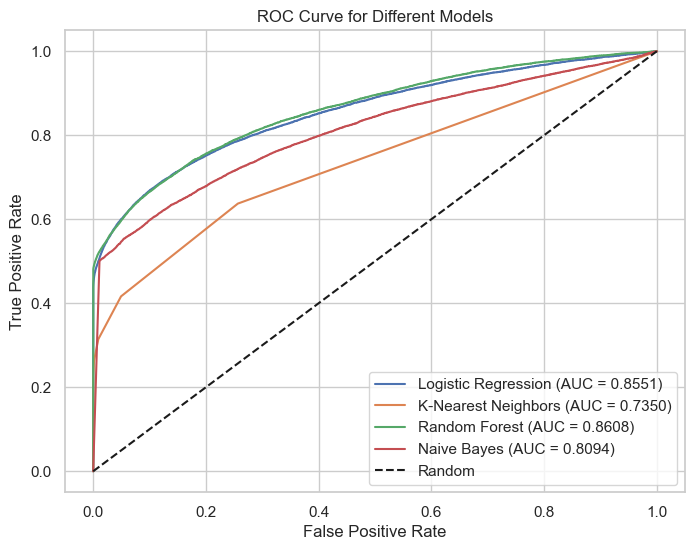

In [52]:
#EVALUASI MODEL
# Menginisialisasi model
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(max_depth=4),
    'Naive Bayes': GaussianNB()
}
# Mengatur ukuran plot
plt.figure(figsize=(8, 6))
# Melakukan pelatihan dan prediksi untuk masing-masing model
for model_name, model in models.items():
    # Pelatihan model
    model.fit(X_train, y_train)

    # Prediksi probabilitas pada set pengujian
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Menghitung nilai fpr, tpr, dan thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Menghitung AUC-ROC
    auc_roc = auc(fpr, tpr)

    # Mencetak hasil AUC-ROC
    print(f'AUC-ROC for {model_name}: {auc_roc:.4f}')

    # Membuat plot ROC Curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_roc:.4f})')

# Plotting garis diagonal
plt.plot([0, 1], [0, 1], linestyle='--', color='k', label='Random')

# Menyesuaikan label dan judul plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend()
plt.show()

In [53]:
# Menginisialisasi model
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(max_depth=4),
    'Naive Bayes': GaussianNB()
}

# Melakukan pelatihan dan prediksi untuk masing-masing model
for model_name, model in models.items():
    # Pelatihan model
    model.fit(X_train, y_train)

    # Prediksi pada set pengujian
    y_pred = model.predict(X_test)

    # Menghitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Mencetak confusion matrix
    print(f'Confusion Matrix for {model_name}:\n{cm}\n')

Confusion Matrix for Logistic Regression:
[[124382    122]
 [  8395   6987]]

Confusion Matrix for K-Nearest Neighbors:
[[123372   1132]
 [ 10547   4835]]

Confusion Matrix for Random Forest:
[[124504      0]
 [ 14428    954]]

Confusion Matrix for Naive Bayes:
[[110569  13935]
 [  6016   9366]]



In [54]:
for model_name, model in models.items():
    # Menghitung skor validasi silang dengan 5 lipatan (bisa disesuaikan)
    cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    # Mencetak skor validasi silang untuk setiap lipatan
    print(f'Cross-Validation Scores for {model_name}: {cross_val_scores}')

    # Mencetak rata-rata skor validasi silang
    print(f'Average Cross-Validation Score for {model_name}: {cross_val_scores.mean():.4f}\n')


Cross-Validation Scores for Logistic Regression: [0.93903186 0.93860294 0.93990502 0.93958333 0.93961305]
Average Cross-Validation Score for Logistic Regression: 0.9393

Cross-Validation Scores for K-Nearest Neighbors: [0.91714154 0.91732537 0.91729473 0.91666667 0.91617519]
Average Cross-Validation Score for K-Nearest Neighbors: 0.9169

Cross-Validation Scores for Random Forest: [0.89474571 0.8926011  0.89200368 0.89453125 0.89220117]
Average Cross-Validation Score for Random Forest: 0.8932

Cross-Validation Scores for Naive Bayes: [0.85923713 0.85635723 0.85435049 0.85258885 0.87997672]
Average Cross-Validation Score for Naive Bayes: 0.8605

